
**Esercizio Lab 1**: Calcolo similarità tra le definizioni create usando cardinalità intersezione


In [2]:
import pandas as pd
definitions_df=pd.read_csv("../data/TLN-definitions-24.csv")


In [3]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#preprocessa una frase tokenizzandola,stemmizando i termini e rimuovendo le stopwords e la punteggiatura,
def preporcess(sentence):
    snow_stm = nltk.stem.SnowballStemmer('english')
    stopword = stopwords.words('english')
    word_tokens = word_tokenize(sentence.lower())
    filtered_tokens = [w for w in word_tokens if w.casefold() not in stopword+list(".,;:?!") ]
    stemmed_words = [snow_stm.stem(word) for word in filtered_tokens]
    return stemmed_words

#esempio di utilizzo
example_string = "The Lusitania had been struck and was sinking rapidly, while the boats were being launched with all possible speed."
preporcess(example_string)

['lusitania', 'struck', 'sink', 'rapid', 'boat', 'launch', 'possibl', 'speed']

In [4]:
#dato il dataframe di definizioni, e un termine specifico
#ritorrna una lista di liste, contenente tutte le parole prepocessate per ogni definizione
def get_definitions(df,word):
    definitions=[]
    for index, row in df.iterrows():
        if not pd.isna(row[word]):
            definitions.append(preporcess(row[word]))
       
    return definitions

#esempio di utilizzo
def_pen=get_definitions(definitions_df,"pen")

In [5]:
#date due liste di token stemmizzati di una definizione
#calcola la similarità come intersezione di parole in comune diviso lunghezza lista più corta
def similarity(def1,def2):
    common_word=set()
    for word in def1:
        if word in def2:
            common_word.add(word)
    if len(common_word)>0:
        return len(common_word)/min(len(def1),len(def2))
    else:
        return 0

#esempio di utilizzo
similarity(def_pen[0],def_pen[1])

In [15]:
from collections import Counter
#calcola la similarità tra ogni coppia di definizione e ne ritorna la media
def pairwise_similarity(def_list):
    similarities=[]
    for i in range(0,len(def_list)):
        for j in range(i,len(def_list)):
            similarities.append(similarity(def_list[i],def_list[j]))
    return sum(similarities)/len(similarities)

#ottiene la lista delle k-parole più frequenti
def top_k_words(def_list, k):
    counts = Counter([w for d in def_list for w in d])
    return  [el[0] for el in counts.most_common(k)]

#calcola la media delle similirità tra le singole definizioni e le top-k parole
def k_similarity(def_list,k):
    similarities=[]
    #rappresentazione del "concetto"
    def_set=top_k_words(def_list,k)
    print(def_set)
    for d in def_list:
        similarities.append(similarity(def_set,d))
    return sum(similarities)/len(similarities)
#esempio di utilizzo
print(top_k_words(def_pen,4))

['use', 'write', 'pen', 'object']


In [18]:
import matplotlib.pyplot as plt

#realizza una visualizzazione grafica delle similarità per i 4 termini in esame
def create_table(data):
    fig, axs = plt.subplots(2, 2)
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
    for (word, val), ax in zip(data.items(), axs.flatten()):
        ax.text(0.5, 0.5, f"{word}\nSimilarity: {val}", fontsize=18, ha='center', va='center')
        ax.axis('off')

    for i, row_label in enumerate(["Generic", "Specific"]):
        axs[i, 0].text(-0.2, 0.5, row_label, fontsize=14, ha='center', va='center', rotation=90)

    for j, col_label in enumerate(["Abstract", "Concrete"]):
        axs[1, j].text(0.5, 2.5, col_label, fontsize=14, ha='center', va='center')
    plt.show()


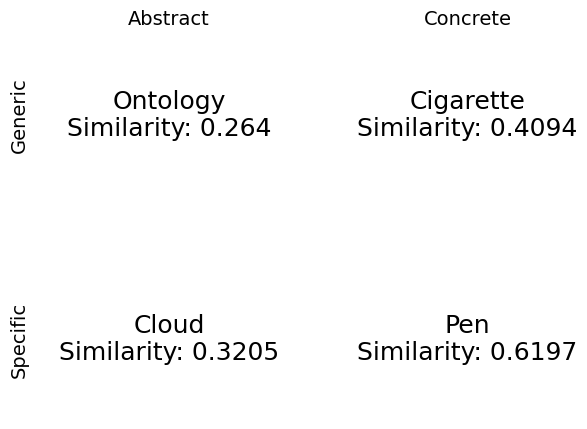

In [21]:
#Pairwise similarity 
def_pen=get_definitions(definitions_df,"pen")
def_cigarette=get_definitions(definitions_df,"cigarette")
def_cloud=get_definitions(definitions_df,"cloud")
def_ontology=get_definitions(definitions_df,"ontology")

data={
    "Ontology": round(pairwise_similarity(def_ontology),4),
    "Cigarette": round(pairwise_similarity(def_cigarette),4),
    "Cloud": round(pairwise_similarity(def_cloud),4),
    "Pen": round(pairwise_similarity(def_pen),4),
}
create_table(data)

['ontolog', 'use', 'studi']
['smoke', 'tobacco', 'paper']
['cloud', 'atmospher', 'water']
['use', 'write', 'pen']


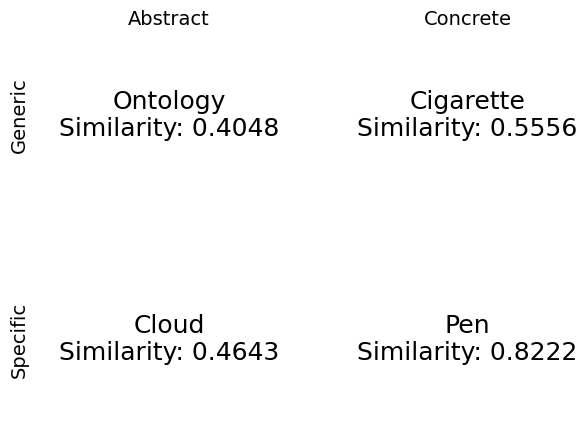

In [22]:
#K similarity 
data2={
    "Ontology": round(k_similarity(def_ontology,3),4),
    "Cigarette": round(k_similarity(def_cigarette,3),4),
    "Cloud": round(k_similarity(def_cloud,3),4),
    "Pen": round(k_similarity(def_pen,3),4),
}
create_table(data2)